#Import Torch and Load Dataset
Below code block imports pytorch and loads the Fashion MNIST dataset from torchvision. Also, the dataset is split into Training and Testing datasets as mini batches with size 64. 

In [0]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Create Neural Network Model
Below we are creating a fully connected Neural Network model an input layer, 3 hidden layers and an output layer. The activation functions being used in the hidden layers are Rectified Linear Unit functions (ReLU) and the log softmax function is used for the output layer. 

Also dropout with a probability of 0.2 is used to prevent overfitting of data.

In [0]:
#Import the nn module from the torch package
from torch import nn
import torch.nn.functional as F
#Create a Network to define the Neural Network
class Network(nn.Module):
  #Define the structure of the different layers of the network
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)
    
    self.dropout = nn.Dropout(p=0.2)
    
  #Define the activation functions to be used in every layer
  def forward(self, x):
    x = x.view(x.shape[0] , -1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = F.log_softmax(self.fc4(x), dim = 1)
    return x
    

In [16]:
#Import the optim module for defining the gradient descent optimizer
from torch import optim

#Define the number of epochs the model should run
epochs = 25

model = Network()

#Define the loss function for the neural network
criterion = nn.NLLLoss()

#Define the optimizer type for the network
optimizer = optim.Adam(model.parameters(), lr = 0.003)

train_losses = []
test_losses = []
for i in range(epochs):
  test_loss = 0
  train_loss = 0  
  
  #Processing the inputs batch by batch
  for images , labels in trainloader:
    #Initializing the gradients to zero
    optimizer.zero_grad()
    
    #Reshaping the input features to 1D
    images = images.view(images.shape[0] , -1)    
    
    #Performing the forward pass of the neural network
    output = model.forward(images)
    
    #Calculating the loss between the output of the foward pass the correct labels
    loss = criterion(output,labels)
    
    #Accumulating the forward pass loss
    train_loss += loss.item()
    
    #Peforming the back propogation to calculate the new gradient values
    loss.backward()
    
    #Updating the weight values with the new gradients
    optimizer.step()
  else:
    with torch.no_grad():
      #Switching to eval so that no dropout during prediction
      model.eval()
      accuracy = 0
      for images , labels in testloader:
        output = model(images)
        #Converting the outputs to probabilities
        ps = torch.exp(output)
        
        #Calculating loss between predicted outputs and class labels
        loss = criterion(output, labels)
        test_loss += loss.item()
        
        #Finding the item with the highest probability
        top_p , top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        
        #Calculate accuracy as to how many items are predicted correctly
        accuracy += torch.mean(equals.type(torch.FloatTensor))
      model.train()
  train_losses.append(train_loss / len(trainloader))
  test_losses.append(test_loss / len(testloader))
  
  #Displaying details for each epoch
  print("Epoch : {} / {}".format(i+1,epochs))
  print("Training Loss : {:.3f}".format(train_loss / len(trainloader)))
  print("Testing Loss : {:.3f}".format(test_loss / len(testloader)))
  print("Accuracy : {:.3f}".format(accuracy*100 / len(testloader)))      

Epoch : 1 / 25
Training Loss : 0.602
Testing Loss : 0.468
Accuracy : 82.872
Epoch : 2 / 25
Training Loss : 0.480
Testing Loss : 0.446
Accuracy : 84.524
Epoch : 3 / 25
Training Loss : 0.456
Testing Loss : 0.444
Accuracy : 83.838
Epoch : 4 / 25
Training Loss : 0.434
Testing Loss : 0.407
Accuracy : 85.689
Epoch : 5 / 25
Training Loss : 0.419
Testing Loss : 0.409
Accuracy : 85.738
Epoch : 6 / 25
Training Loss : 0.410
Testing Loss : 0.400
Accuracy : 85.947
Epoch : 7 / 25
Training Loss : 0.402
Testing Loss : 0.406
Accuracy : 85.888
Epoch : 8 / 25
Training Loss : 0.399
Testing Loss : 0.383
Accuracy : 86.186
Epoch : 9 / 25
Training Loss : 0.390
Testing Loss : 0.392
Accuracy : 86.226
Epoch : 10 / 25
Training Loss : 0.389
Testing Loss : 0.390
Accuracy : 86.555
Epoch : 11 / 25
Training Loss : 0.391
Testing Loss : 0.386
Accuracy : 86.445
Epoch : 12 / 25
Training Loss : 0.380
Testing Loss : 0.387
Accuracy : 86.555
Epoch : 13 / 25
Training Loss : 0.376
Testing Loss : 0.378
Accuracy : 86.973
Epoch : 

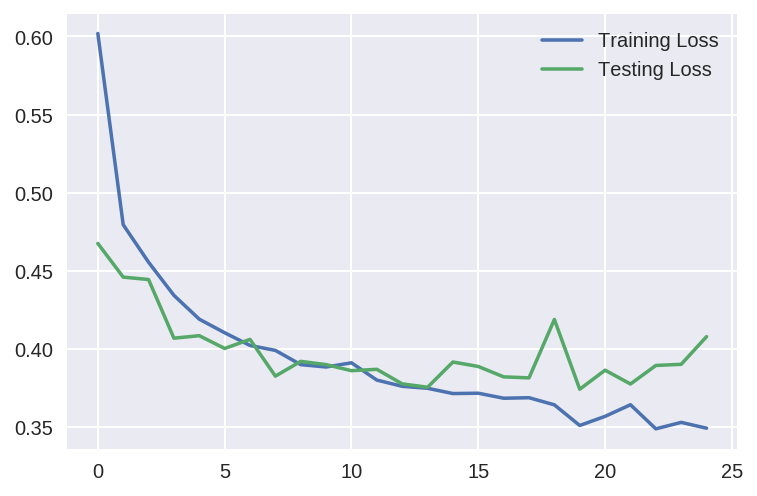

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as plt
#Plot shwoing change of train and test loss across epochs
plt.pyplot.plot(train_losses , label = 'Training Loss')
plt.pyplot.plot(test_losses , label = 'Testing Loss')
plt.pyplot.legend(frameon=False)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


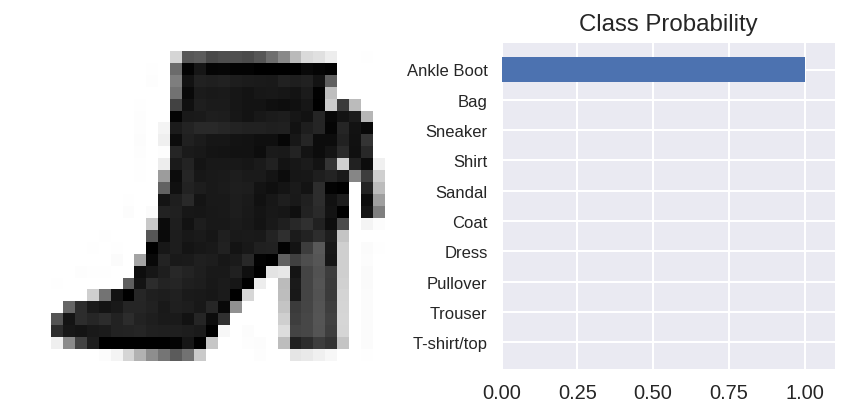

In [20]:
# Testing the network

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
view_classify(img.view(1, 28, 28), ps, version='Fashion')